In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import zlib
import string
import random
import sys

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import tqdm

In [2]:
def generate_random_dataset(num_features, num_rows, num_classes):
    numerical_data = np.random.rand(num_rows, num_features)
    df = pd.DataFrame(numerical_data, columns=[f"feature_{i}" for i in range(1, num_features + 1)])
    df['target'] = np.random.randint(0, num_classes, size=num_rows)
    return df

In [3]:
def generate_random_string(length):
    letters = string.ascii_letters + string.digits
    return ''.join(random.choice(letters) for _ in range(length))

# Q6.1

In [22]:
num_exp = 20
test_dimensions = [2, 4, 8]
for dim in test_dimensions:
    n_full = 2 ** dim
    n_avg = 0
    for i in range(num_exp):
        dataset = generate_random_dataset(dim, n_full, 2)
        X = dataset.drop('target', axis=1)
        y = dataset['target']
        X_train = X.copy()
        y_train = y.copy()
        for idx in range(n_full):
            X_train = X.drop(index=idx)
            y_train = y.drop(index=idx)
            knn = KNeighborsClassifier(n_neighbors=1)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X)
            different = False
            for i in range(len(y)):
                if y[i] != y_pred[i]:
                    different = True
                    break
            if different:
                n_avg += 1
    n_avg /= num_exp
    print(f"d={dim}: n_full={n_full}, Avg. req. points for memorization n_avg={n_avg:.2f}, n_full/n_avg={n_full/n_avg}")


d=2: n_full=4, Avg. req. points for memorization n_avg=2.40, n_full/n_avg=1.6666666666666667
d=4: n_full=16, Avg. req. points for memorization n_avg=8.20, n_full/n_avg=1.9512195121951221
d=8: n_full=256, Avg. req. points for memorization n_avg=129.15, n_full/n_avg=1.9821912504839334


In [31]:
num_exp = 20
test_dimensions = [2, 4, 8]
for dim in test_dimensions:
    n_full = 2 ** dim
    n_avg = 0
    for i in range(num_exp):
        dataset = generate_random_dataset(dim, n_full, 5)
        X = dataset.drop('target', axis=1)
        y = dataset['target']
        X_train = X.copy()
        y_train = y.copy()
        for idx in range(n_full):
            X_train = X.drop(index=idx)
            y_train = y.drop(index=idx)
            knn = KNeighborsClassifier(n_neighbors=1)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X)
            different = False
            for i in range(len(y)):
                if y[i] != y_pred[i]:
                    different = True
                    break
            if different:
                n_avg += 1
    n_avg /= num_exp
    print(f"d={dim}: n_full={n_full}, Avg. req. points for memorization n_avg={n_avg:.2f}, n_full/n_avg={n_full/n_avg}")


d=2: n_full=4, Avg. req. points for memorization n_avg=3.45, n_full/n_avg=1.1594202898550725
d=4: n_full=16, Avg. req. points for memorization n_avg=12.45, n_full/n_avg=1.285140562248996
d=8: n_full=256, Avg. req. points for memorization n_avg=203.35, n_full/n_avg=1.2589132038357511


# Q6.2

In [2]:
data_raw = pd.read_csv('/content/heart.csv')
X = data_raw.drop('output', axis=1)
y = data_raw['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2


In [3]:
dt1 = tree.DecisionTreeClassifier()

dt1.fit(X_train, y_train)

y_pred = dt1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7868852459016393


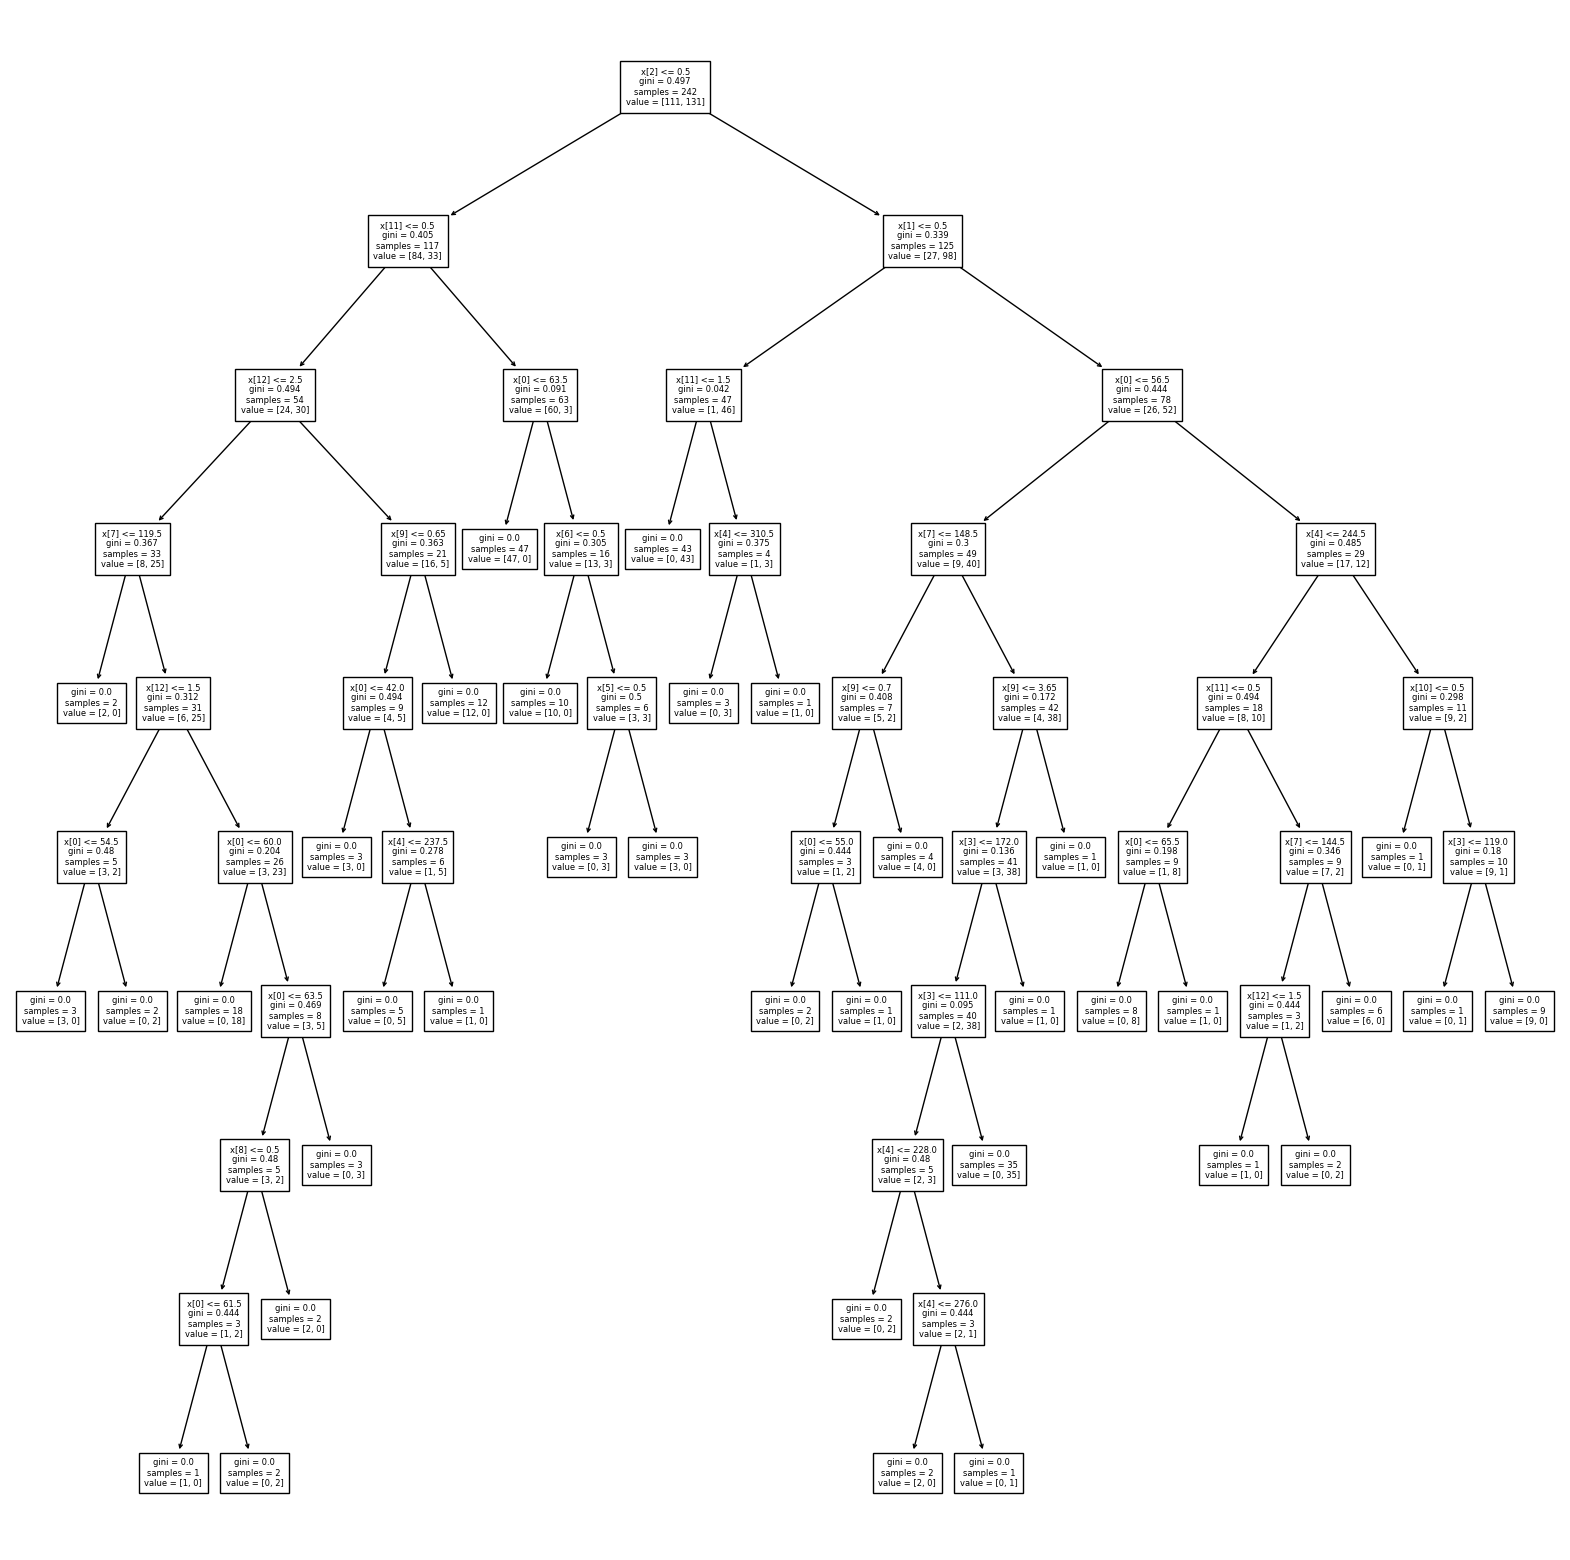

In [4]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt1, fontsize=6)
plt.show()

In [5]:
dt2 = tree.DecisionTreeClassifier(max_depth=3)

dt2.fit(X_train, y_train)

y_pred = dt2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.819672131147541


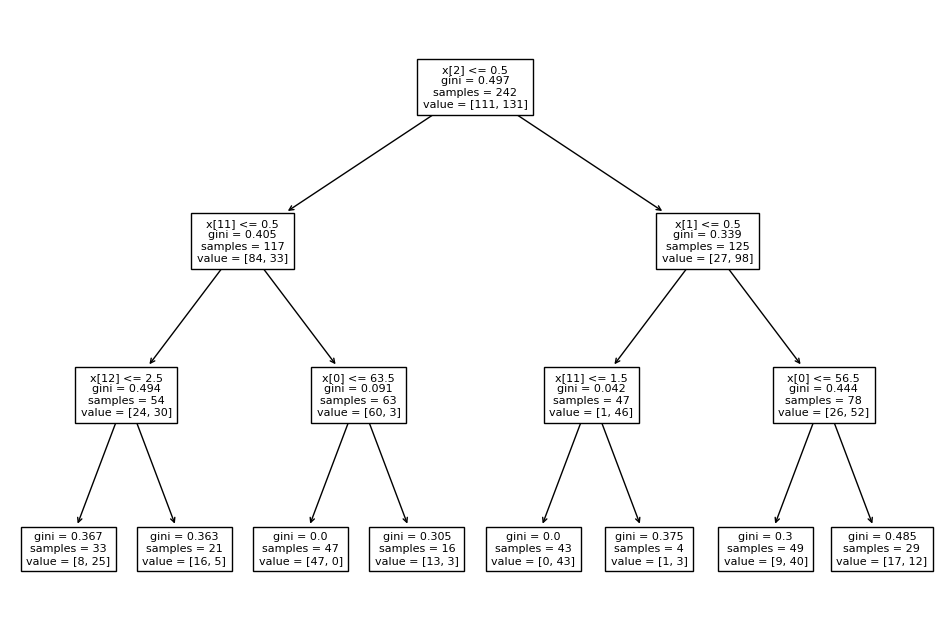

In [6]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt2, fontsize=8)
plt.show()

In [7]:
dt3 = tree.DecisionTreeClassifier(max_leaf_nodes=8)

dt3.fit(X_train, y_train)

y_pred = dt3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7540983606557377


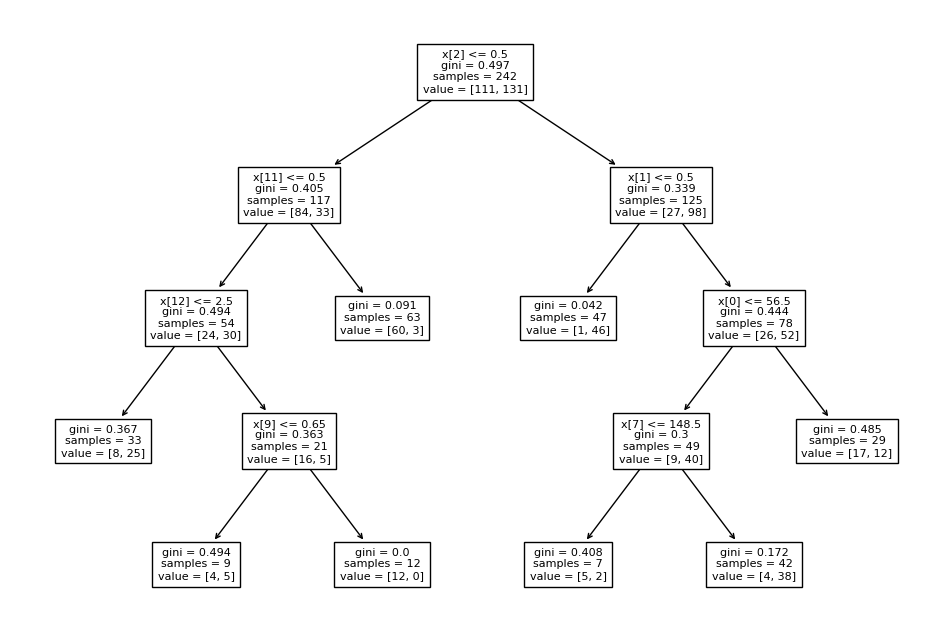

In [8]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt3, fontsize=8)
plt.show()

In [22]:
data_raw = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data_raw = data_raw.dropna()
X = data_raw.drop('stroke', axis=1)
y = data_raw['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5036,57159,Male,56.0,0,0,Yes,Self-employed,Rural,125.87,24.6,never smoked
3179,23893,Male,24.0,0,0,Yes,Private,Urban,103.45,25.1,smokes
4149,57080,Female,81.0,1,1,Yes,Self-employed,Urban,59.11,20.7,formerly smoked
1649,40393,Female,32.0,0,0,No,Private,Urban,68.19,21.1,never smoked
2981,69329,Female,62.0,0,0,Yes,Private,Rural,203.57,29.1,Unknown


In [23]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', tree.DecisionTreeClassifier(max_depth=3))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9541751527494908


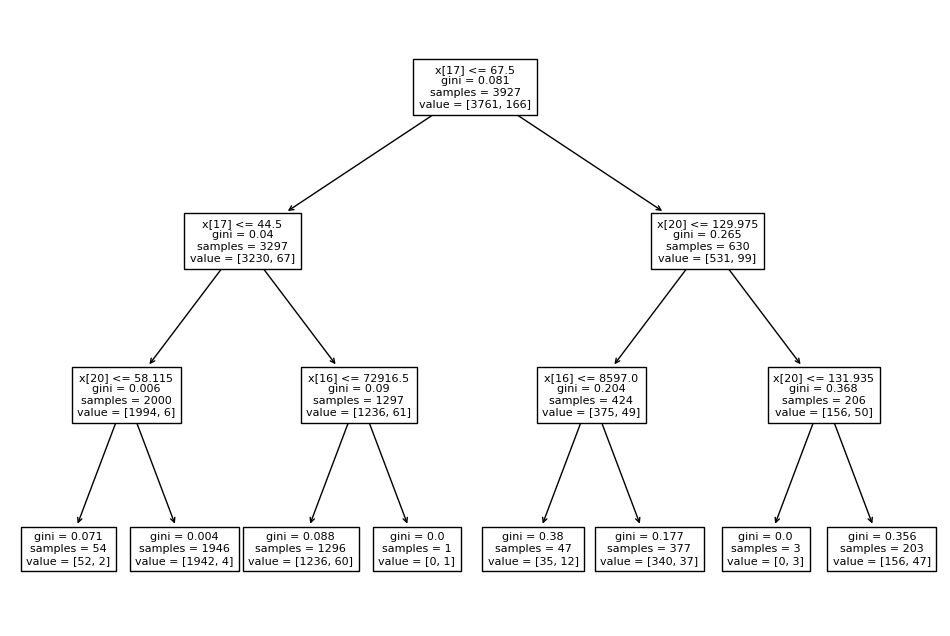

In [24]:
plt.figure(figsize=(12,8))
tree.plot_tree(pipeline['classifier'], fontsize=8)
plt.show()

In [79]:
random_dataset = generate_random_dataset(5, 1000, 2)
X = random_dataset.drop('target', axis=1)
y = random_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
687,0.893375,1.645318,-3.154200,1.410895,-1.109553
500,-1.438866,0.579128,-1.788463,-0.692195,-0.315527
332,0.626235,-0.353869,1.370535,0.073198,0.322181
979,-0.330763,-0.291903,0.119736,-0.115354,-0.255583
817,1.635701,0.703540,-0.277989,2.043371,-0.870054


In [80]:
dt5 = tree.DecisionTreeClassifier(max_depth=3)

dt5.fit(X_train, y_train)

y_pred = dt5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.48


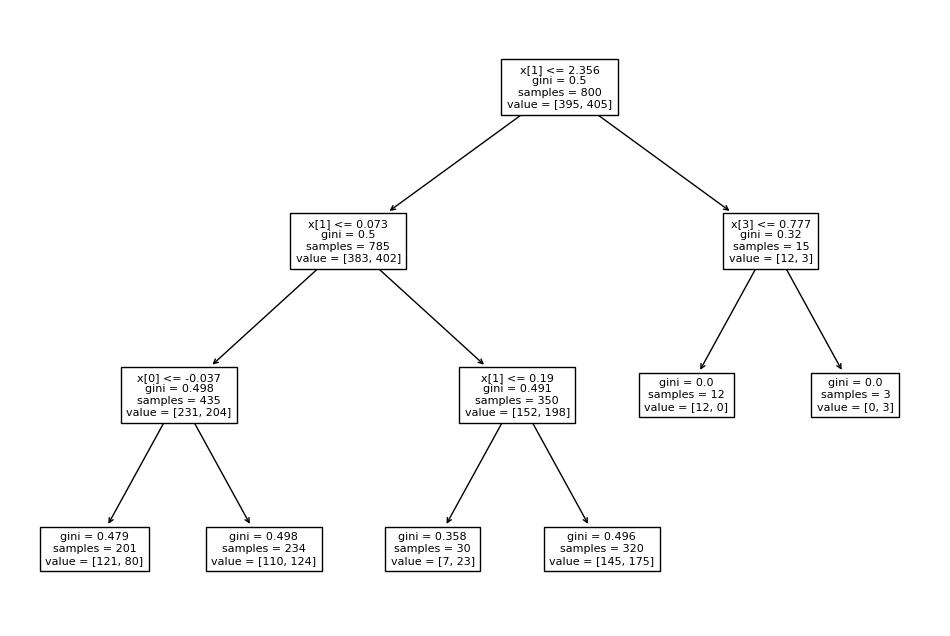

In [81]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt5, fontsize=8)
plt.show()

# Q6.3

In [54]:
original_string = generate_random_string(200)
compressed_data = zlib.compress(original_string.encode())

original_size = sys.getsizeof(original_string)
compressed_size = sys.getsizeof(compressed_data)

print("Original String:", original_string)
print("Original String Size:", original_size)
print("Compressed Data:", compressed_data)
print("Compressed Data Size:", compressed_size)
print("Compression Ratio:", compressed_size / original_size)

Original String: kp3ijzSQruGn4ucezwwsgvyW8vNdOYqgGZj1CHbBctSNzH7FrbyBjvbzb52YuPUBzkqY76ENvcaE0d14UDOfQ5UD2J8m8HJThyRT6Ahwfc6XHcM2oR3oY0mJ6nknEWpzWVdDrh2zc54lieTGNi1fOaMYnu6VmaNnB1Xi0zfrCxHaTdlStLLlhkCzH3ztDetjgg0YlQkM
Original String Size: 249
Compressed Data: b'x\x9c\x05\xc1\xc9\x16C0\x14\x00\xd0_2\x86m\r\x95\xe3\x10UT\xd3\x1d1\x87h\xd5P\xef\xeb{/\x7f\xab\xfd\x00I\xbcl\x9e\xd06V\xc3q|\xdb\xfd\xcc\xcd\x9dT\x11\xfd\xb4\xdek\x90m\\ZlM\x08`\xe3\xba\x94\xa75\xec%\x94\xbaB\xb7[f\x01\xffP\x03\xb9dg\x85+U\xb2\x969Q\x13\xeb\x99\xa3\xf8\xe6db?\xed\xce{\x8a.\xdd\xd10\xf4\xc4,T\xe6\xbb:Si\xf2\x91\xe0\xc2\xcd\xdf\x90?*g\xe9\x14`\xba6\xf6u\xea\x91^n\xa2"\xa4bC\x8f\xa9 \xc2\x92\x9f\xbd\x04\xcdb\xffp\x91Vc\xb2\x06\xc1\xd8q\x1b\xb0\n\xabS\xafC\xdbJt\x8cy\xf8\x07\x81\x9aE\xa5'
Compressed Data Size: 215
Compression Ratio: 0.8634538152610441


We see that the compression ratio is not very good. This is because the string is random, and there are no patterns/redundency for the compression algorithm to exploit. In a completely random string, the expected compression ratio should be close to 1:1.

# Q9.1

In [33]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.conv = nn.Conv2d(1, 3, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(3 * 13 * 13, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = x.view(-1, 3 * 13 * 13)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x


class SmallerNet(nn.Module):
    def __init__(self):
        super(SmallerNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 5, 1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(3, 3, 3, 1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(3 * 5 * 5, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 3 * 5 * 5)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [32]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print(len(train_set))
print(len(test_set))

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

60000
10000


In [34]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    for imgs, labels in data_loader:

        #To Enable GPU Usage
        imgs, labels = imgs.to(device), labels.to(device)

        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

def train(model, device, train_loader, test_loader, num_epochs, learn_rate):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learn_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}:")
        for imgs, labels in tqdm.notebook.tqdm(train_loader):

            imgs, labels = imgs.to(device), labels.to(device)

            # actual training
            out = model(imgs)
            loss = criterion(out, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # save losses
            iters.append(n)
            losses.append(float(loss)/64)
            n += 1
        # compute accuracy and store in array for plotting
        train_acc.append(get_accuracy(model, train_loader))
        val_acc.append(get_accuracy(model, test_loader))
        print("Training Accuracy: {}".format(train_acc[-1]))
        print("Validation Accuracy: {}".format(val_acc[-1]))

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(train_acc, label="Train")
    plt.plot(val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

    return model

cuda
Epoch 1:


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 2:


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 3:


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 4:


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 5:


  0%|          | 0/938 [00:00<?, ?it/s]

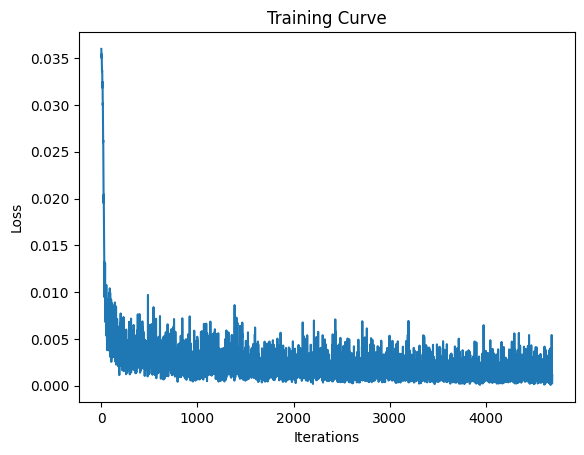

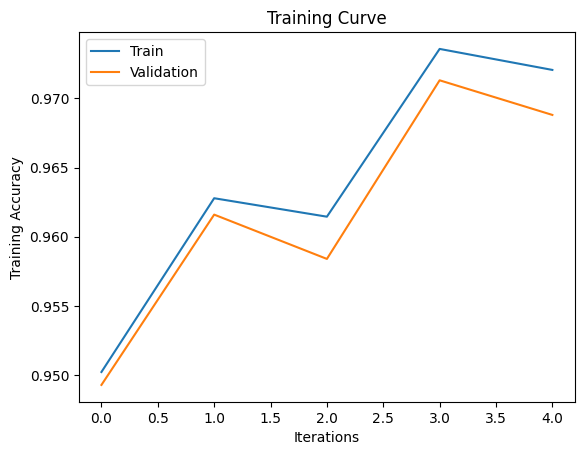

Final Training Accuracy: 0.97205
Final Validation Accuracy: 0.9688


SmallNet(
  (conv): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=507, out_features=10, bias=True)
)

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = SmallNet().to(device)

train(model, device, train_loader, test_loader, 5, 0.01)

cuda
Epoch 1:


  0%|          | 0/938 [00:00<?, ?it/s]

Training Accuracy: 0.9495666666666667
Validation Accuracy: 0.9552
Epoch 2:


  0%|          | 0/938 [00:00<?, ?it/s]

Training Accuracy: 0.9605166666666667
Validation Accuracy: 0.962
Epoch 3:


  0%|          | 0/938 [00:00<?, ?it/s]

Training Accuracy: 0.9664166666666667
Validation Accuracy: 0.968
Epoch 4:


  0%|          | 0/938 [00:00<?, ?it/s]

Training Accuracy: 0.9697833333333333
Validation Accuracy: 0.9728
Epoch 5:


  0%|          | 0/938 [00:00<?, ?it/s]

Training Accuracy: 0.9713666666666667
Validation Accuracy: 0.9751


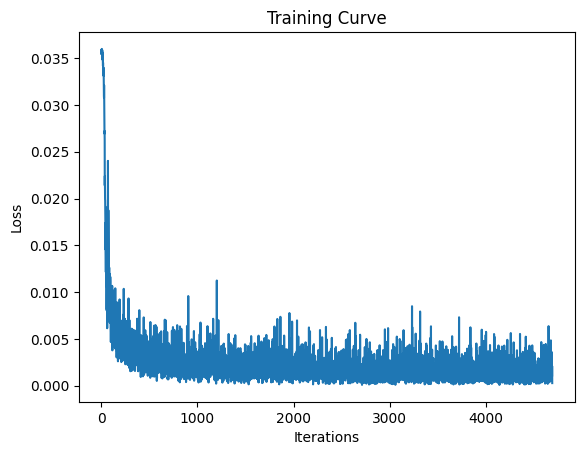

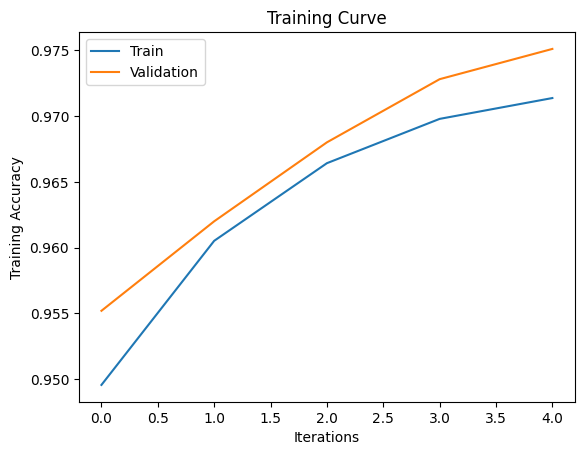

Final Training Accuracy: 0.9713666666666667
Final Validation Accuracy: 0.9751


SmallerNet(
  (conv1): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=75, out_features=10, bias=True)
)

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = SmallerNet().to(device)

train(model, device, train_loader, test_loader, 5, 0.01)